In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson


In [14]:
# we will be looking at a stretch on chr6

coverage_values = pd.read_csv('obs6.txt', header=None, names=['Coverage'])



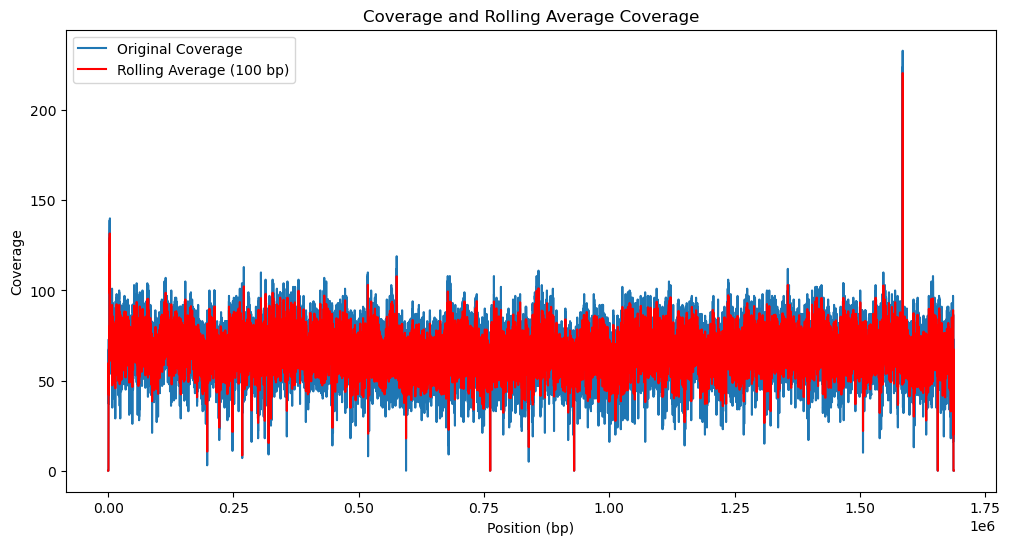

In [16]:
average_coverage = coverage_values['Coverage'].mean()

# Step 3: Calculate rolling average
coverage_values['Rolling_Average'] = coverage_values['Coverage'].rolling(window=100).mean()

# Step 4: Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(coverage_values['Coverage'], label='Original Coverage')
plt.plot(coverage_values['Rolling_Average'], label='Rolling Average (100 bp)', color='red')
plt.title('Coverage and Rolling Average Coverage')
plt.xlabel('Position (bp)')
plt.ylabel('Coverage')
plt.legend()
plt.show()

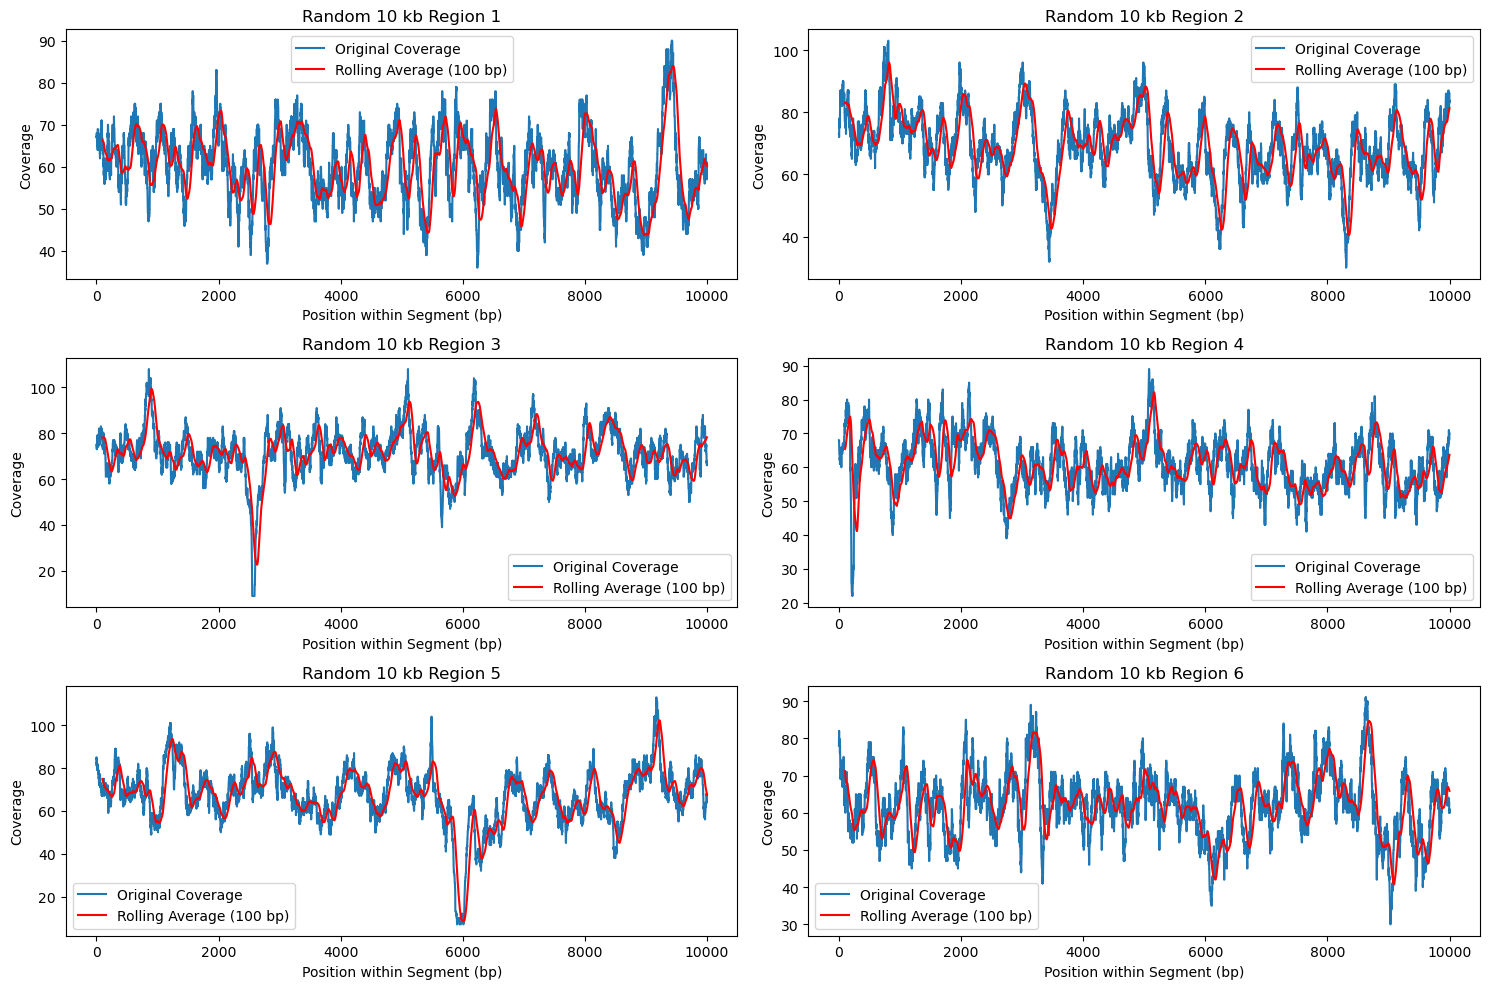

In [19]:
# Select 5 random 10 kb regions
import random
random_segments = []
for _ in range(6):
    start = random.randint(0, len(coverage_values) - 10000)
    end = start + 10000
    segment = coverage_values['Coverage'].iloc[start:end]
    random_segments.append(segment)

# Step 2 & 3: Calculate rolling average and visualize for each segment
plt.figure(figsize=(15, 10))
for i, segment in enumerate(random_segments, 1):
    rolling_average = segment.rolling(window=100).mean()
    plt.subplot(3, 2, i)
    plt.plot(segment.values, label='Original Coverage')
    plt.plot(rolling_average.values, label='Rolling Average (100 bp)', color='red')
    plt.title(f'Random 10 kb Region {i}')
    plt.xlabel('Position within Segment (bp)')
    plt.ylabel('Coverage')
    plt.legend()

plt.tight_layout()
plt.show()

## We can see here that rolling average smoothes the data pretty significantly 